# Quickstart
This notebook shows some very simple example of getting started.

First we need to install some dependancies into your conda or venv environment

In [1]:
!pip install pandas matplotlib zarr fsspec s3fs intake intake_xarray intake_parquet

#### Open the intake Catalog

In [2]:
import intake
catalog  = intake.open_catalog('https://mastapp.site/intake/catalog.yml')
catalog

intake:
  args:
    path: https://mastapp.site/intake/catalog.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata:
    version: 1


#### List All Shots

In [3]:
shots_df = catalog.index.level1.shots().read()
shots_df

,url,preshot_description,postshot_description,campaign,current_range,divertor_config,plasma_shape,comissioner,facility,shot_id,...,cpf_vol_ipmax,cpf_vol_max,cpf_vol_truby,cpf_wmhd_ipmax,cpf_wmhd_max,cpf_wmhd_truby,cpf_zeff_ipmax,cpf_zeff_max,cpf_zeff_truby,cpf_zmag_efit
0,s3://mast/level1/shots/11695.zarr,\n0.1T TF SHOT\n,\nOK\n,M5,None,Conventional,None,None,MAST,11695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s3://mast/level1/shots/11696.zarr,\nSTANDARD 0.3T TF SHOT\n,\nOK\n,M5,None,Conventional,None,None,MAST,11696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3://mast/level1/shots/11697.zarr,\nRAISE TO 0.5T\n,"\nOK, ALARMS ARE LOWER\n",M5,None,Conventional,None,None,MAST,11697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s3://mast/level1/shots/11698.zarr,\nRAISE TO .56T\n,\nSTILL ALARMS BUT LOWER AGAIN\n,M5,None,Conventional,None,None,MAST,11698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s3://mast/level1/shots/11699.zarr,\nRAISE TO .58T\n,\nOK\n,M5,None,Conventional,None,None,MAST,11699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15916,s3://mast/level1/shots/30467.zarr,\nRepeat with new neutron camera position.\ncH...,\nTwo times lower DD neutron rate than referen...,M9,700 kA,Conventional,Connected Double Null,None,MAST,30467,...,9.029202,9.046394,0.0,49469.122469,52653.445,0.0,NaN,NaN,NaN,0.013202
15917,s3://mast/level1/shots/30468.zarr,\nRepeat with new neutron camera position.\ncH...,\nGood beam.\nGood repeat.\n,M9,700 kA,Conventional,Lower Single Null,None,MAST,30468,...,9.102411,9.107017,0.0,48516.962675,49382.133,0.0,NaN,NaN,NaN,0.012445
15918,s3://mast/level1/shots/30469.zarr,\nRepeat with increased beam power (74 kV)\ncH...,\nGood shot. Modes present.\n,M9,700 kA,Conventional,Connected Double Null,None,MAST,30469,...,8.988730,9.047923,0.0,47466.249616,49115.805,0.0,NaN,NaN,NaN,0.015299
15919,s3://mast/level1/shots/30470.zarr,\nRepeat last using hydrogen in outboard and c...,\nNo HF gas.\n,M9,700 kA,Conventional,None,None,MAST,30470,...,9.687049,10.055509,0.0,17290.432865,22310.516,0.0,NaN,NaN,NaN,0.015164


#### List All Sources

In [4]:
sources_df = catalog.index.level1.sources().read()
sources_df

,description,quality,uuid,shot_id,name,url
0,Plasma Current and PF/TF Coil Currents,Not Checked,8d2954b9-6059-5b92-a0d9-da514dd93f64,11695,amc,s3://mast/level1/shots/11695.zarr/amc
1,Output from EFIT's wall model: calculated indu...,Not Checked,ebc00c03-4bc6-5250-9373-b206c3e7106f,11695,amm,s3://mast/level1/shots/11695.zarr/amm
2,Basic EFIT,Not Checked,fd0a0dc4-1ed8-546f-8c02-455061374fd4,11695,efm,s3://mast/level1/shots/11695.zarr/efm
3,Digital Plasma Control,Bad,3d641eef-123b-5ac6-9db3-64dee94a62b1,11695,xdc,s3://mast/level1/shots/11695.zarr/xdc
4,Plasma Current and PF/TF Coil Currents,Not Checked,2ac9a6d3-cc69-5979-9476-52fdf1f9bd25,11696,amc,s3://mast/level1/shots/11696.zarr/amc
...,...,...,...,...,...,...
308129,RBG 2D multi-colour visible bremsstrahlung camera,Not Checked,a94efa26-63b2-517f-afa5-08b95c309b96,30471,rgc,s3://mast/level1/shots/30471.zarr/rgc
308130,Digital Plasma Control,Not Checked,eff7b842-1a77-5a25-bf70-35d9caa8ce79,30471,xdc,s3://mast/level1/shots/30471.zarr/xdc
308131,D-alpha emission and other spectral lines,Not Checked,0ec648d8-0322-5325-b526-cb3315a1de4b,30471,xim,s3://mast/level1/shots/30471.zarr/xim
308132,Magnetic Field Measurements: OMAHA high freque...,Not Checked,ffffb16c-447b-579e-8798-4e6731539c73,30471,xmo,s3://mast/level1/shots/30471.zarr/xmo


#### List all signals Given a Shot Number

In [5]:
signals_df = catalog.index.level1.signals(shot=30420).read()
signals_df

,quality,shape,provenance,description,signal_type,dimensions,uuid,shot_id,name,version,rank,url,source,units
0,Not Checked,[],None,,Analysed,[],241c96df-a7fc-55bf-b375-44bf15a49d32,30420,aga/status,0,0,s3://mast/level1/shots/30420.zarr/aga/status,aga,None
1,Not Checked,[73],None,,Analysed,[time],cede67e8-3fef-5085-a585-2de2089c57e6,30420,ayc/laser_track,0,1,s3://mast/level1/shots/30420.zarr/ayc/laser_track,ayc,None
2,Not Checked,[3161],None,,Analysed,[time],9d480bc4-b7c5-5377-a5be-7dbd56f99ef1,30420,ait/ptot_osp_elm,0,1,s3://mast/level1/shots/30420.zarr/ait/ptot_osp...,ait,None
3,Not Checked,"[3161, 214]",None,,Analysed,"[time, dim_0]",190f241e-8cb5-5eeb-b659-6897fe13def5,30420,ait/qprofile_isp,0,2,s3://mast/level1/shots/30420.zarr/ait/qprofile...,ait,None
4,Not Checked,"[3161, 214]",None,,Analysed,"[time, dim_0]",74bd3349-4285-523e-b2da-66afcfec937d,30420,ait/qprofile_isp_elm,0,2,s3://mast/level1/shots/30420.zarr/ait/qprofile...,ait,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,Not Checked,"[18, 300000]",None,,Raw,"[hcam_l_channel, time]",cdbb8a91-8e3a-5411-9cea-670bc546dca0,30420,hcam_l,-1,2,s3://mast/level1/shots/30420.zarr/hcam_l,xsx,None
865,Not Checked,"[18, 300000]",None,,Raw,"[hcam_u_channel, time]",6cfe584f-276a-5c79-9612-0ee4de158919,30420,hcam_u,-1,2,s3://mast/level1/shots/30420.zarr/hcam_u,xsx,None
866,Not Checked,[300000],None,,Raw,[time],30084190-10ca-5cbb-b9fb-48216c98304f,30420,xsx/relay_monitor,-1,1,s3://mast/level1/shots/30420.zarr/xsx/relay_mo...,xsx,None
867,Not Checked,"[18, 300000]",None,,Raw,"[tcam_channel, time]",10170616-9105-5a61-8077-4770560c0295,30420,tcam,-1,2,s3://mast/level1/shots/30420.zarr/tcam,xsx,None


#### Open and plot shot data. 

Here we are visualising some plasma current data.

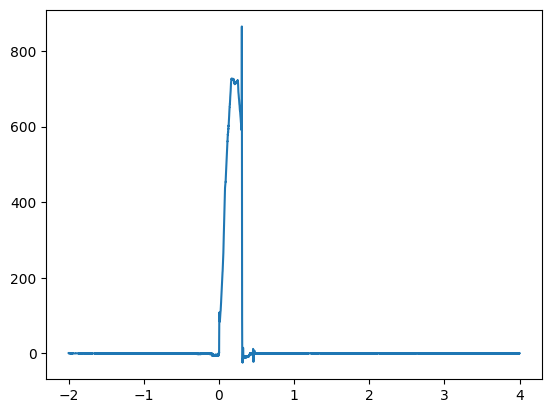

In [6]:
import matplotlib.pyplot as plt
dataset = catalog.level1.sources(url="s3://mast/level1/shots/30420.zarr/amc").to_dask()
plt.plot(dataset['time'], dataset['plasma_current'])